# Loss Surface and Cotour Plots for 2 Weights Space

Below is a code for plotting the cost function of a linear model. The linear_loss() function takes as input a grid of weights w0 and w1 and calculates the loss of each one of these weights combinations for a model (y).

Plot_loss() function is help you see how to visualise a loss surface for 2D input space. We need to plot the surface in 3D space because the 3rd dimension is occupied by the loss value while the first two dimensions are occupied by the two weights, one of them the bias and one is a coefficient for a 1d linear model!

We plot the surface along with a contour plot that represents the surface which project the 3D surface onto 2D space. This trick allows us to use 2D Contour plots to express a 3D surface with the aid of colours to express how high or low the loss in each point of the 2D grid.

Remember in simple linear regression the number of weights corresponds to the number of input space.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

## Loss for Linear Model

Below is a code for plotting the cost function of a linear model. The linear_loss() function takes as input a grid of weights w0 and w1 and calculates the loss of each one of these weights combinations for a model (y).


In [4]:
def linear_loss(W0, W1, x, y, ax1):
    n = len(x)
    n0, n1 = len(W0), len(W1)
    J = np.zeros((n0,n1))
    J_points = np.zeros((n0,n1))
   
    # iterate through the meshgrid and pick few examples
    for i in range(n0):
        for j in range(n1):            
            ymdl = W0[i,j] + W1[i,j]*x             
            J[i,j] = np.sum((1/(2*n))*(y - ymdl)**2)
        if (i+j)%50==0:
            ax1.plot(x,ymdl,'--b',label='y={} + {}x'.format(round(W0[i,j]), round(W1[i,j],1)))
            J_points[i,j] = 1
    return J, J_points

## Surface and Contour Plots for Linear Loss

Plot_loss() function is help you see how to visualise a loss surface for 2D input space. We need to plot the surface in 3D space because the 3rd dimension is occupied by the loss value while the first two dimensions are occupied by the two weights, one of them the bias and one is a coefficient for a 1d linear model!

We plot the surface along with a contour plot that represents the surface which project the 3D surface onto 2D space. This trick allows us to use 2D Contour plots to express a 3D surface with the aid of colours to express how high or low the loss in each point of the 2D grid.

Remember in simple linear regression the number of weights corresponds to the number of input space.

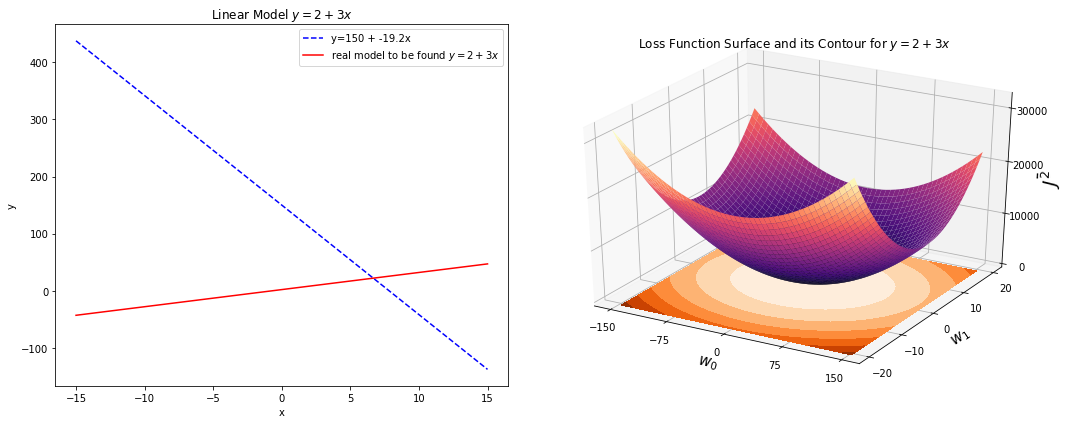

In [5]:
def plot_loss():

    # y is the real model with w0=2 and w1=3 we will see that the cost funciton will be minimal at this point(2,3)
    n = 50
    x = np.linspace(-15, 15, n)
    y = 2 + 3*x # + np.random.rand()*0.1

    #Plot a 3D surface
    fg = plt.figure(figsize=(15, 6))
    spec2 = fg.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1.2])
    ax1   = fg.add_subplot(spec2[0, 0])
    ax2   = fg.add_subplot(spec2[0, 1], projection='3d')

    w0rng = np.linspace(-150, 150, n)
    w1rng = np.linspace(-20, 20, n)

    W0,W1 = np.meshgrid(w0rng,w1rng)
    J, J_points = linear_loss(W0,W1,x,y,ax1)

    ax1.plot(x,y,'r',label='real model to be found $y=2+3x$')
    ax2.plot_surface(W0, W1, J, cmap=cm.magma)
    ax2.contourf    (W0, W1, J, cmap=cm.Oranges ,offset=-1000)
    
    # Below we annotate the figure's to help the visualisation
    ax1.set_title('Linear Model $y=2+3x$')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()

    ax2.set_xticks(np.linspace(-150,150,5))
    ax2.set_yticks(np.linspace(-20,20,5))
    ax2.set_zticks(np.linspace(0,30000,4))

    ax2.set_xlabel('$w_0$',fontsize=15)
    ax2.set_ylabel('$w_1$',fontsize=15)
    ax2.set_zlabel('$\\bar{J^2}$', fontsize=18)
    ax2.set_title('Loss Function Surface and its Contour for $y=2+3x$')
    plt.tight_layout()

    plt.savefig('figures/CostFunctionContour.png')
    
plot_loss()


### Different Visualisation
We can plot the surface as wires in order to show the surface more transparently

In [ ]:

plt.figure(figsize=(9, 5))
ax = plt.axes(projection='3d')
ax.contour3D(W0, W1, J, 50, cmap='binary')
ax.contourf(W0, W1, J, cmap=cm.Oranges ,offset= -0.1)
plt.tight_layout()
